In [25]:
import os
import numpy as np

In [26]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.av.image_filters as fil
import cv2 as ocv
from commons.MAT import Mat
import PIL as pil

In [27]:
import preprocess.av.av_utils as av

In [28]:
file = Mat(file_name='wide_image_03.mat')
original = file.get_image('I2')[:,:,1]
img = Image(image_arr=original)

In [29]:
# org1 = np.array(org)[:,:,1]

In [30]:
# img.from_array(org1)

In [31]:
original = file.get_image('I2')

In [32]:
img = Image(image_arr=file.get_image('I2')[:,:,1])

In [33]:
img.apply_bilateral(img.img_array)

INFO:root:Applying Bilateral filter.


In [34]:
dif_bilateral = img.get_signed_diff_int8(img.img_array ,img.img_bilateral)

In [35]:
# img.from_array(img.img_bilateral)

In [36]:
img.apply_gabor(255-dif_bilateral,kernel_bank=fil.get_chosen_gabor_bank())
# img.from_array(255-img.img_gabor)

INFO:root:Applying Gabor filter.


In [37]:
img.create_skeleton(array_2d=img.img_gabor,kernels=fil.get_chosen_skeleton_filter())

In [38]:
# img.histogram(255-img.img_gabor)

In [39]:
lattice = Lattice(image_arr_2d=img.img_gabor)

In [40]:
lattice.generate_lattice_graph(eight_connected=False)

INFO:root:Creating 4-connected lattice.


In [41]:
# lattice.chunk_lattice(lattice.lattice, (3,4))

In [42]:
# test_ix = 0
# gp = lattice.k_lattices[test_ix] 
# res = lattice.get_slice_focused(img.img_skeleton, gp)

In [43]:
import preprocess.av.lattice_utils as lat

In [44]:
images =  [(0.6, 255-img.img_gabor),(0.7, img.img_array)]

In [45]:
lat.assign_cost(graph=lattice.lattice,images=images,alpha=3,log=False,override=True)

In [46]:
import preprocess.algorithms.ature_mst as mst

In [52]:
seed_node_list = lat.get_seed_node_list(img.img_skeleton)

In [ ]:
mst.run_mst(lattice_object=lattice,seed=seed_node_list,node_limit_per_seed=80000, weight_limit_per_seed=120000,number_of_seeds=5)

Seed: 0
Node Count: 50421, Weight: 120001.40165081534
Seed: 1
Node Count: 50718, Weight: 120000.44543237115
Seed: 2
Node Count: 50405, Weight: 120001.6906247743
Seed: 3


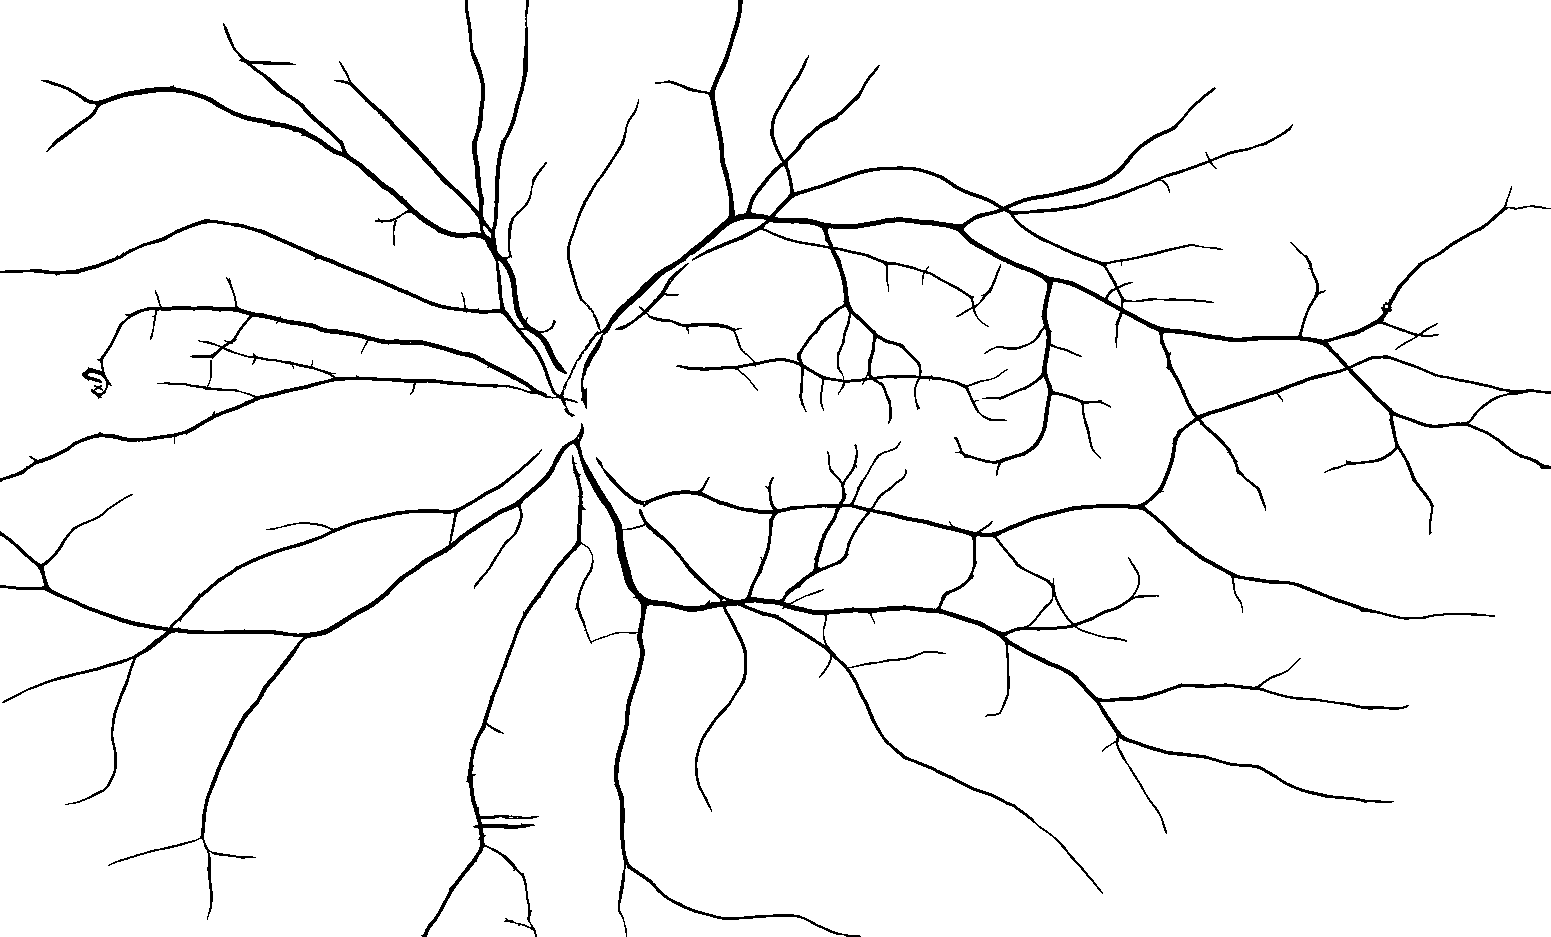

In [54]:
img.from_array(255-lattice.accumulator)

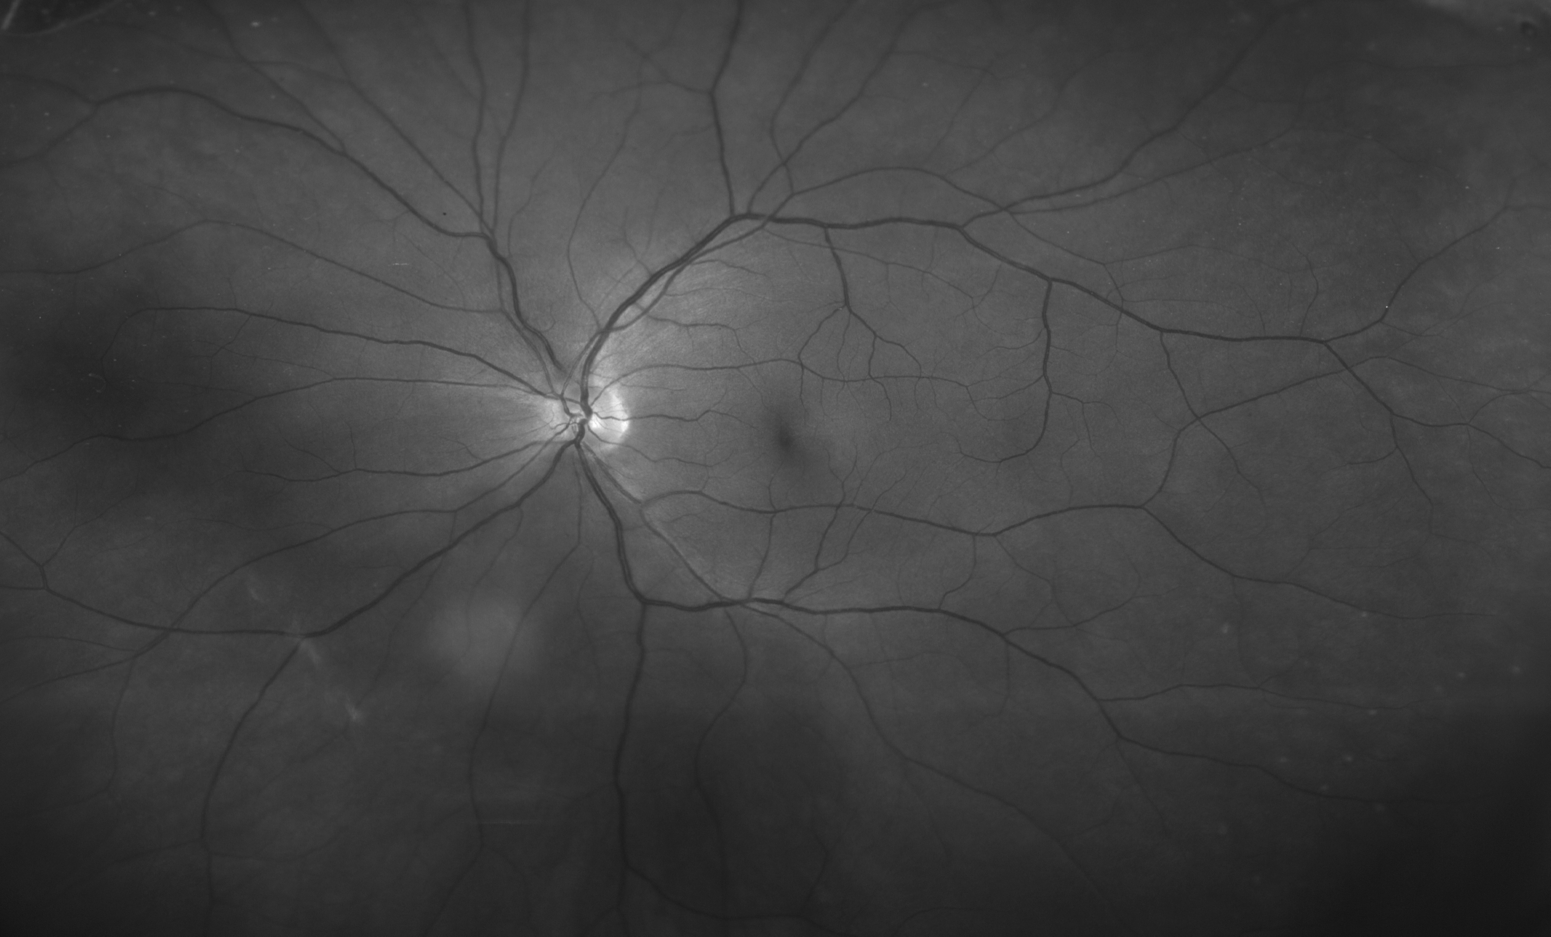

In [77]:
x= 255-img.img_gabor
img.from_array(img.img_array-lattice.accumulator)

In [29]:
len(seed_node_list)

10874

In [27]:
lattice.total_weight

0.0